In [1]:
import pandas as pd
import geopandas as gpd

river = gpd.read_file('./river/ne_50m_rivers_lake_centerlines.shp')
files = pd.DataFrame(river)
files.head(5)

# files.to_csv('test_river.csv', encoding='utf-8-sig')

,scalerank,featurecla,name,note,min_zoom,name_alt,min_label,name_en,label,wikidataid,...,name_tr,name_vi,name_zh,ne_id,name_fa,name_he,name_uk,name_ur,name_zht,geometry
0,6,Lake Centerline,Kama,None,4.7,None,6.0,Kama,Kama,Q79082,...,Kama,Kama,卡馬河,1159125905,رود کاما,קאמה,Кама,دریائے کاما,卡馬河,"LINESTRING (51.93713 55.70107, 51.88087 55.686..."
1,6,River,Kama,None,4.7,None,6.0,Kama,Kama,Q79082,...,Kama,Kama,卡馬河,1159125917,رود کاما,קאמה,Кама,دریائے کاما,卡馬河,"LINESTRING (53.69385 58.20632, 53.67715 58.273..."
2,3,Lake Centerline,Abay,None,3.0,None,4.0,Lesser Abay,None,Q3501984,...,Abay,Abay,阿拜河,1159125319,ابی,אבאי,Абая,ابے,阿拜,"LINESTRING (37.11301 11.85499, 37.15037 11.893..."
3,3,Lake Centerline,Al Furat,None,3.0,None,4.0,Euphrates,Al Furat,Q34589,...,Fırat,Euphrates,幼发拉底河,1159125935,فرات,פרת,Євфрат,دریائے فرات,幼发拉底河,"LINESTRING (38.56119 35.86264, 38.36534 35.903..."
4,6,Lake Centerline,Alabama,None,5.0,None,6.0,Alabama,Alabama,Q558643,...,Alabama,Alabama,阿拉巴馬河,1159114961,آلاباما,נהר אלבמה,Алабама,البامہ,阿拉巴馬河,"MULTILINESTRING ((-86.52177 33.03212, -86.5209..."


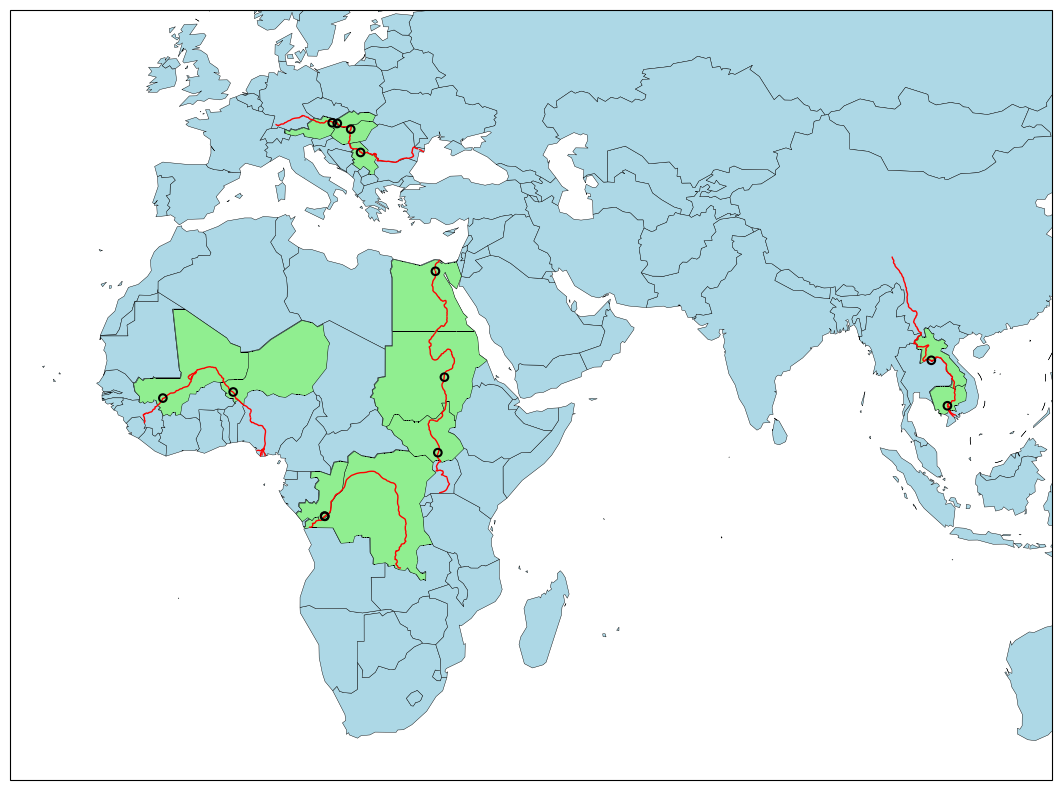

In [10]:
# 流经首都的河流

import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# 读取数据
world = gpd.read_file('./worldmap4/world.json')
world = world.to_crs(ccrs.PlateCarree())
rivers = gpd.read_file('./river/ne_50m_rivers_lake_centerlines.shp')
rivers = rivers.to_crs(ccrs.PlateCarree())


countries_to_fill = ['柬埔寨', '老挝', '刚果（金）', '刚果（布）', '马里', '尼日尔', '埃及', '苏丹', '南苏丹', '奥地利', '匈牙利', '塞尔维亚', '斯洛伐克']
rivers_to_fill = ['Nile', 'White Nile', 'Damietta Branch', 'Mekong', 'Lualaba', 'Congo', 'Danube', 'Sfântu Gheorghe branch', 'Niger']
lat1, lon1 = 17.96232562580174, 102.61118194031367   # 万象
lat2, lon2 = 11.557384130754683, 104.92773994940228   # 金边
lat3, lon3 = 30.046440937603307, 31.235117558539653   # 开罗
lat4, lon4 = 15.600067138432657, 32.529402767155034   # 喀土穆
lat5, lon5 = 4.854133127611956, 31.582505970121243   # 朱巴
lat6, lon6 = -4.303620336484073, 15.31254804749304   # 金沙萨
lat7, lon7 = -4.271532257282476, 15.277094297066055   # 布拉柴维尔
lat8, lon8 = 12.648269458834022, -7.996869335873068   # 巴马科
lat9, lon9 = 13.511233652392134, 2.125040884212267   # 尼亚美
lat10, lon10 = 48.223546608523755, 16.382827282546447   # 维也纳
lat11, lon11 = 48.14774427219382, 17.110161701671508   # 布拉迪斯拉发
lat12, lon12 = 47.498487991715976, 19.040593166560612   # 布达佩斯
lat13, lon13 = 44.81879553526021, 20.460454417360314   # 贝尔格莱德



fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Miller()})
world.plot(ax=ax, color='lightblue', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())

for country in countries_to_fill:
    country_data = world[world['name'] == country]
    if not country_data.empty:
        country_data.plot(ax=ax, color='lightgreen', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())

for river in rivers_to_fill:
    river_data = rivers[rivers['name_en'] == river]
    if not river_data.empty:
        river_data.plot(ax=ax, color='red', linewidth=1, transform=ccrs.PlateCarree())

lonList = [lon1, lon2, lon3, lon4, lon5, lon6, lon7, lon8, lon9, lon10, lon11, lon12, lon13]
latList = [lat1, lat2, lat3, lat4, lat5, lat6, lat7, lat8, lat9, lat10, lat11, lat12, lat13]
ax.scatter(lonList, latList, edgecolor='black', facecolor='none', marker='o', s=30, linewidths=1.5, zorder=5, transform=ccrs.PlateCarree())


# 设置横纵坐标刻度不可见
ax.tick_params(axis='both', which='both', length=0, labelsize=0)

# 设置地图显示范围
ax.set_extent([120, -30, -40, 60], crs=ccrs.PlateCarree())

# 保存图像并显示
plt.savefig('output1.png', dpi=300, bbox_inches='tight')
plt.show()


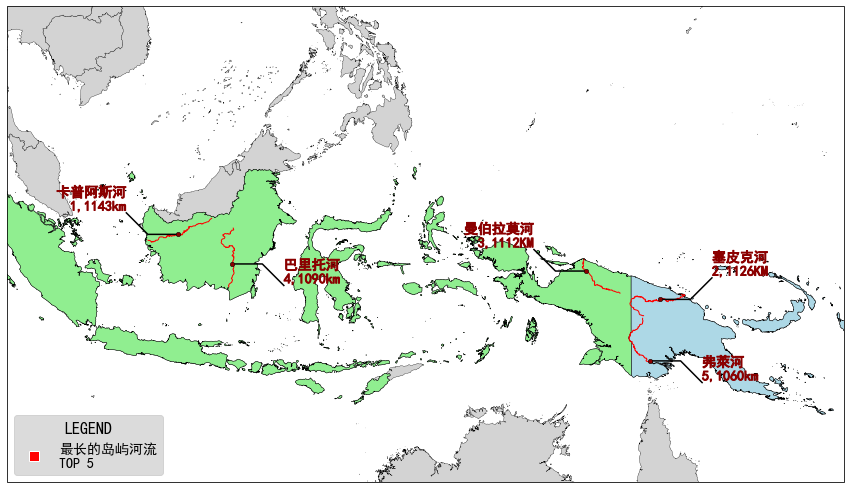

In [2]:
# 岛上的河流

import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.patheffects as PathEffects

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


def loopFillColor(world, countryList, color):
    for country in countryList:
        country_data = world[world['FCNAME'] == country]
        if not country_data.empty:
            country_data.plot(ax=ax, color=color, edgecolor='black', linewidth=0.5, transform=ccrs.PlateCarree())


def loopDrawRiver(rivers, riverList, specialList, color):
    for river in riverList:
        river_data = rivers[rivers['name_en'] == river]
        if not river_data.empty:
            river_data.plot(ax=ax, color=color, linewidth=1, transform=ccrs.PlateCarree())
        if any(element[0] == river for element in specialList):
            name = rivers[rivers['name_en'] == river]['name_zh'].values[0]
            rank = [item for item in specialList if item[0] == river][0][6]
            words = name + '\n' + rank
            lon = [item for item in specialList if item[0] == river][0][1]
            lat = [item for item in specialList if item[0] == river][0][2]
            direction1 = [item for item in specialList if item[0] == river][0][3]
            direction2 = [item for item in specialList if item[0] == river][0][4]
            angle = [item for item in specialList if item[0] == river][0][5]
            lineMark(2, angle, 2, lon, lat, direction1, direction2, words, 'darkred')


def lineMark(horizontal_length, angle, line_length, lon, lat, direction1, direction2, content, color):
    if direction1 == 1:
        end_lon = lon + horizontal_length
        end_lat = lat
        if direction2 == 1:
            final_lon = end_lon + line_length * np.cos(np.radians(angle))
            final_lat = end_lat + line_length * np.sin(np.radians(angle))
        elif direction2 == 0:
            final_lon = end_lon + line_length * np.cos(np.radians(angle))
            final_lat = end_lat - line_length * np.sin(np.radians(angle))
        else:
            print('direction2 type error')
        ax.scatter(lon, lat, edgecolor='black', facecolor=color, marker='o', s=20, linewidths=0.5, zorder=5, transform=ccrs.PlateCarree())
        ax.plot([lon, end_lon, final_lon], [lat, end_lat, final_lat], color='black', transform=ccrs.PlateCarree(), zorder=4)
        txt = ax.text(final_lon, final_lat, f"{content}", verticalalignment='bottom', horizontalalignment='left', transform=ccrs.PlateCarree(), fontsize=14, weight='bold', color='darkred')
        txt.set_path_effects([PathEffects.withStroke(linewidth=1, foreground='darkred')])
    elif direction1 == 0:
        end_lon = lon - horizontal_length
        end_lat = lat
        if direction2 == 1:
            final_lon = end_lon - line_length * np.cos(np.radians(angle))
            final_lat = end_lat + line_length * np.sin(np.radians(angle))
        elif direction2 == 0:
            final_lon = end_lon - line_length * np.cos(np.radians(angle))
            final_lat = end_lat - line_length * np.sin(np.radians(angle))
        else:
            print('direction2 type error')
        ax.scatter(lon, lat, edgecolor='black', facecolor=color, marker='o', s=20, linewidths=0.5, zorder=5, transform=ccrs.PlateCarree())
        ax.plot([lon, end_lon, final_lon], [lat, end_lat, final_lat], color='black', transform=ccrs.PlateCarree(), zorder=4)
        txt = ax.text(final_lon, final_lat, f"{content}", verticalalignment='bottom', horizontalalignment='right', transform=ccrs.PlateCarree(), fontsize=14, weight='bold', color='darkred')
        txt.set_path_effects([PathEffects.withStroke(linewidth=1, foreground='darkred')])
    else:
        print('direction1 type error')


# 读取地图和河流数据
world = gpd.read_file('./worldmap1/World_countries.shp')
# world = gpd.read_file('./worldmap4/world.json')
world = world.to_crs(ccrs.PlateCarree())
rivers = gpd.read_file('./river/ne_10m_rivers_lake_centerlines/ne_10m_rivers_lake_centerlines.shp')
rivers = rivers.to_crs(ccrs.PlateCarree())

fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Miller()})
world.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())

countries_to_fill1 = ['印度尼西亚']
loopFillColor(world, countries_to_fill1, 'lightgreen')
countries_to_fill2 = ['巴布亚新几内亚']
loopFillColor(world, countries_to_fill2, 'lightblue')
rivers_to_fill = ['Kapuas', 'Barito', 'Fly', 'Sepik', 'Mamberamo', 'Taritatu']
specialList = [['Kapuas', 111.2424848420747, 0.12485335949005141, 0, 1, 45, '1,1143km'], 
               ['Barito', 114.76336254253512, -1.8194250015978013, 1, 0, 45, '4,1090km'], 
               ['Fly', 142.2496519331932, -8.172092779746366, 1, 0, 45, '5,1060km'], 
               ['Sepik', 142.89588674048287, -4.1454953452195, 1, 1, 45, '2,1126KM'], 
               ['Mamberamo', 138.0261227354159, -2.285639547815169, 0, 1, 45, '3,1112KM']]
loopDrawRiver(rivers, rivers_to_fill, specialList, 'red')

legend_elements = [
    Line2D([0], [0], marker='s', color='w', markerfacecolor='red', markersize=10, label='最长的岛屿河流\nTOP 5', linestyle='None')
]
legend = ax.legend(handles=legend_elements, loc='lower left', title='LEGEND', title_fontsize=16,prop={'size': 14})
legend.get_frame().set_facecolor('lightgray')

ax.tick_params(axis='both', which='both', length=0, labelsize=0)
ax.set_extent([100, 155, -16, 15], crs=ccrs.PlateCarree())

# 保存图像并显示
plt.savefig('output1.png', dpi=300, bbox_inches='tight')
plt.show()


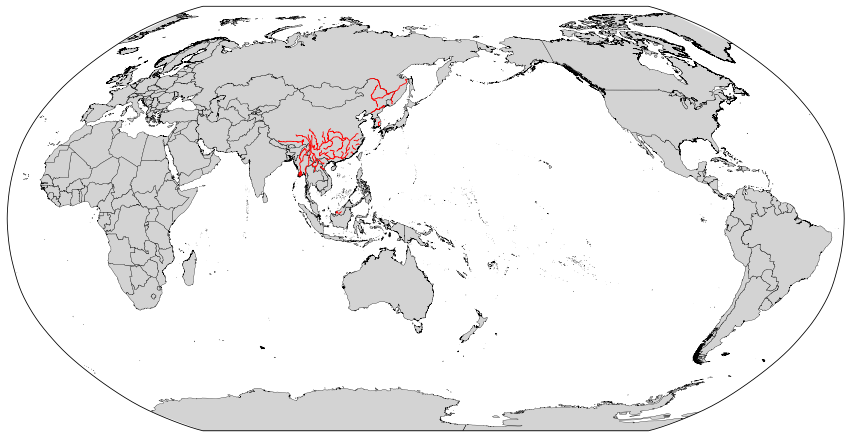

In [5]:
# 江与河
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.patheffects as PathEffects

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


# 世界地图
world = gpd.read_file('./worldmap1/World_countries.shp')
world = world.to_crs(ccrs.PlateCarree())
# 世界河流
rivers = gpd.read_file('./river/ne_10m_rivers_lake_centerlines/ne_10m_rivers_lake_centerlines.shp')
filtered_rivers = rivers[rivers['name_zh'].str.contains('江', na=False)] # 过滤出中文名称中有江字的河流
filtered_rivers = filtered_rivers[filtered_rivers['name_zh'] != '雅鲁藏布江'] # 删除原本的雅鲁藏布江数据集
han = rivers[rivers['name_zh'] == '汉水'] # 获取汉水（汉江）数据
lancang = rivers[rivers['name'] == 'Lancang'] # 获取澜沧江数据
filtered_rivers = pd.concat([filtered_rivers, han, lancang])
filtered_rivers = filtered_rivers.to_crs(ccrs.PlateCarree())
# 读取新的雅鲁藏布江数据
ylzb = gpd.read_file('./kml2geojson/ylzb.json')
ylzb = ylzb.to_crs(ccrs.PlateCarree())

fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Robinson(central_longitude=150)})
world.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())
filtered_rivers.plot(ax=ax, color='red', linewidth=0.8, transform=ccrs.PlateCarree())
ylzb.plot(ax=ax, color='red', linewidth=0.8, transform=ccrs.PlateCarree())


ax.tick_params(axis='both', which='both', length=0, labelsize=0)
# ax.set_extent([-180, 180, -60, 75], crs=ccrs.PlateCarree())

plt.savefig('output2.png', dpi=600, bbox_inches='tight')
plt.show()
